In [5]:
words = open('words.txt','r').read().splitlines()

In [6]:
words[:10]

['abaca',
 'abachi',
 'abachista',
 'abachisti',
 'abaco',
 'abadessa',
 'abadesse',
 'abadia',
 'abadie',
 'abarica']

In [7]:
len(words)

313342

In [8]:
min(len(w) for w in words)

2

In [9]:
max(len(w) for w in words)

17

In [10]:
#predicts the next token (character) given the one before

In [11]:
b = {}
for w in words:
    chs = ['<S>']+list(w)+['<E>']
    for ch1, ch2 in zip(chs,chs[1:]):
        bigram= (ch1,ch2)
        b[bigram] = b.get(bigram,0)+1 #count all the bigrams and add how many times they occur

In [ ]:
sorted(b.items(),key = lambda kv: -kv[1]) #sort by the count of elements

In [13]:
""" 
2D array where the rows will have the first entry of the bigram and the columns the second.
and the values will be the count ( how often the second character follows the first inside the dataset)
"""


' \n2D array where the rows will have the first entry of the bigram and the columns the second.\nand the values will be the count ( how often the second character follows the first inside the dataset)\n'

In [14]:
import torch

In [75]:
N = torch.zeros((27,27),dtype = torch.int32)

In [76]:
"""
convert from letters to numvers 
first get all the available letters from the dataset (not smart way but this makes sure we are not skipping any)
"""

characters = sorted(set(''.join(words ))) #just take all the letters
stoi = {s:i+1 for i,s in enumerate(characters) } #+1 to make a start from 1
## add the special character for start and end at a new index
stoi['.']=0

itos= {i:s for s,i in stoi.items() }

In [82]:
for w in words:
    chs = ['.']+list(w)+['.'] #<> arejust a convention to deny special characters
    for ch1, ch2 in zip(chs,chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1,ix2]+=1
        

(np.float64(-0.5), np.float64(26.5), np.float64(26.5), np.float64(-0.5))

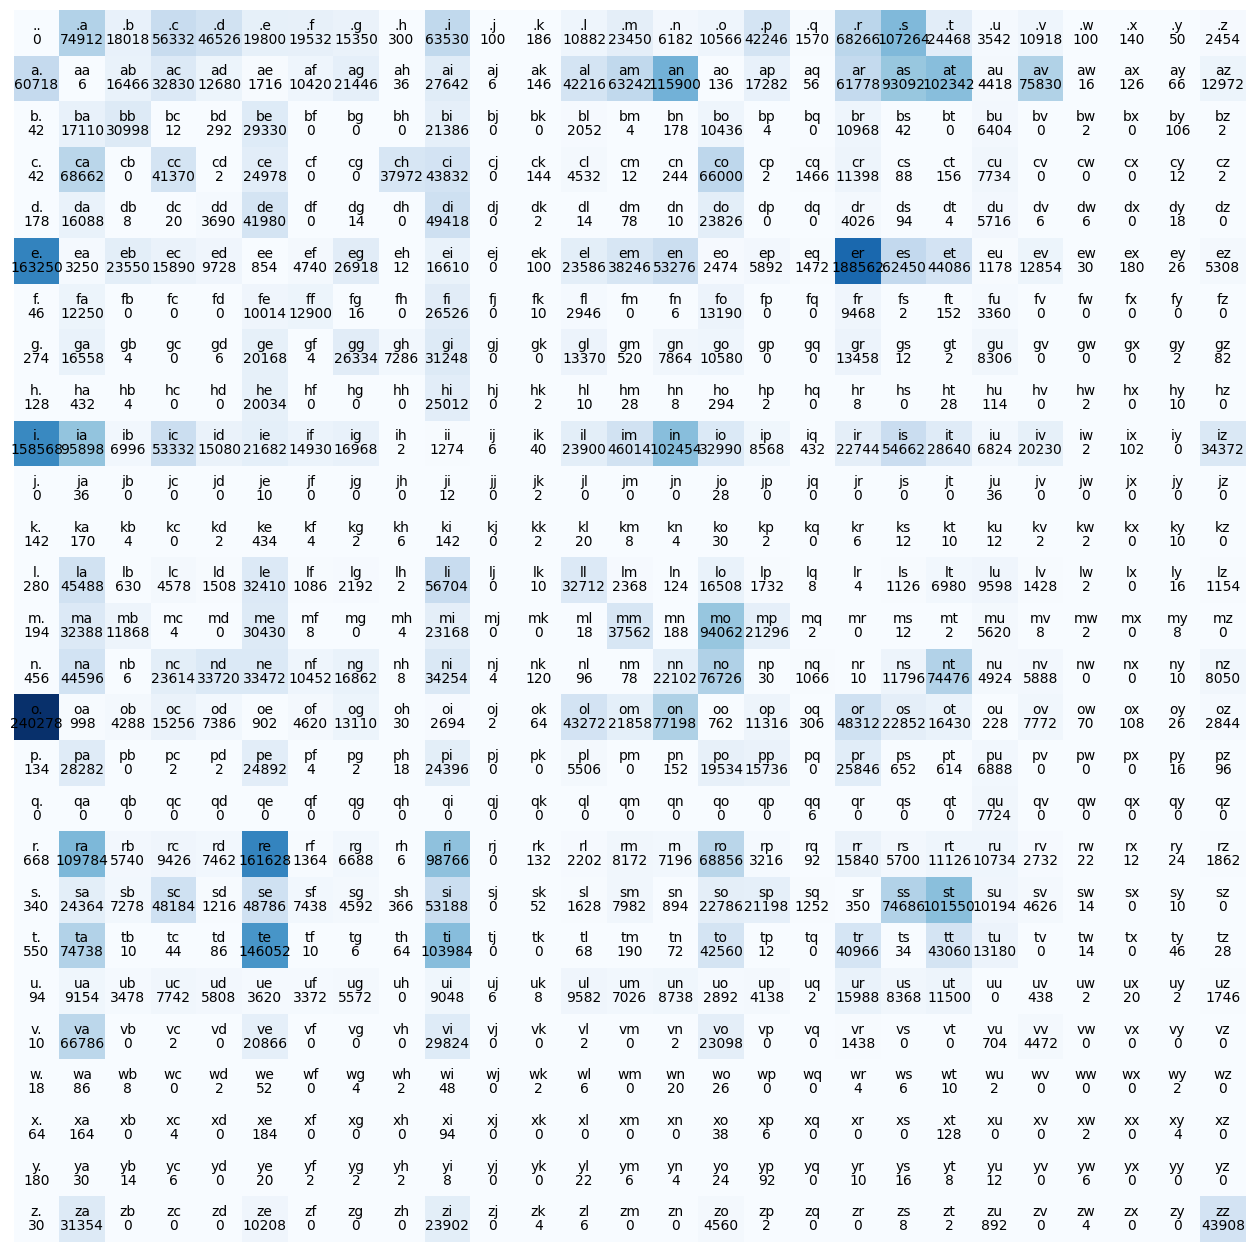

In [83]:
import matplotlib.pyplot as plt
%matplotlib inline
#plt.imshow(counts)
#nicer plot
plt.figure(figsize=(16,16))
plt.imshow(N,cmap='Blues')

for i in range(27):
    for j in range(27):
        chstr = itos[i]+itos[j]
        plt.text(j,i,chstr, ha="center",va="bottom")
        plt.text(j,i,N[i,j].item(),ha="center",va="top")
plt.axis('off')

In [84]:
#sampling from the bigram data

In [85]:
N[0]

tensor([     0,  74912,  18018,  56332,  46526,  19800,  19532,  15350,    300,
         63530,    100,    186,  10882,  23450,   6182,  10566,  42246,   1570,
         68266, 107264,  24468,   3542,  10918,    100,    140,     50,   2454],
       dtype=torch.int32)

In [86]:
"""
convert to probabilities %
and normalize the values, making the sum be = 1
"""
prob = N[0].float()
prob= prob / prob.sum()
prob

tensor([0.0000e+00, 1.1954e-01, 2.8751e-02, 8.9889e-02, 7.4242e-02, 3.1595e-02,
        3.1167e-02, 2.4494e-02, 4.7871e-04, 1.0137e-01, 1.5957e-04, 2.9680e-04,
        1.7364e-02, 3.7419e-02, 9.8646e-03, 1.6860e-02, 6.7412e-02, 2.5052e-03,
        1.0893e-01, 1.7116e-01, 3.9044e-02, 5.6520e-03, 1.7422e-02, 1.5957e-04,
        2.2340e-04, 7.9785e-05, 3.9158e-03])

In [87]:
"""
now on our data
"""
gen = torch.Generator().manual_seed(2147483647)

index = torch.multinomial(prob,num_samples=1,replacement=True,generator=gen).item()
itos[index]

'c'

In [96]:
""" JUST TO SHOW HOW IT WORKS
using a pytorch generator just to make the sampling deterministic
"""
gen = torch.Generator().manual_seed(2147483647)
p = torch.rand(3,generator=gen)
p = p / p.sum()

"""
torch.multinomial to get a sample (using our generator) of the data
"""
torch.multinomial(p,num_samples=20,replacement=True,generator=gen)

tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1])

In [98]:
"""
pre preparred matrix of noralized probabilities
keepdim=False, after the sum of each Rows or Cols "squeeze" out the fact that now the
matrix i a 1 by X where all the Xs are the sum of the corrisponding row or col.
by keeping it = False this 1 by... is removed, leaving us with just the array of sums
we want to keep the dimensions so keepdim=True
Broadcasting:
https://pytorch.org/docs/stable/notes/broadcasting.html
Two tensors are “broadcastable” if the following rules hold:
- Each tensor has at least one dimension.
- When iterating over the dimension sizes, starting at the trailing dimension, the dimension sizes must either be equal, one of them is 1, or one of them does not exist.
our case:

27 x 27  => full data P
27 x 1   => our sum P.sum(1,keepdim=True)
the dimension that is 1 gets "broadcasted" so almost like expanded to match the by 27 of the other array
such that actions can be performed on these 2 matrix the 27x1 is copied over and 
"""

P =N.float()
P = P / P.sum(1,keepdim=True)
probAtIndex=probAtIndex/probAtIndex.sum()

In [95]:
gen = torch.Generator().manual_seed(2147483647)

for i in range(10):
    out = []
    ix = 0
    while True:
        #probAtIndex=N[ix].float()
        #probAtIndex=probAtIndex/probAtIndex.sum()
        ix = torch.multinomial(probAtIndex,num_samples=1,replacement=True,generator=gen).item()
        out.append(itos[ix])
        if ix == 0: #it's the end token .
            break
    print(''.join(out))

ce.
bbaloglluraicchitatamponimo.
tainollava.
mo.
da.
steripubrtterigotasimo.
isertio.
se.
tedo.
enterimmpide.
